In [ ]:
from __future__ import annotations
import numpy as np
from scipy.interpolate import interp1d
from typing import Callable
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

def residuals(params: tuple[float, float], x: np.ndarray,
              y: np.ndarray, func: Callable) -> np.ndarray:
    return y - func(x, params)

def linear(x: float | np.ndarray,
           params: tuple[float, float]) -> float | np.ndarray:
    a0, a1 = params
    return a0 + a1 * x

def power(x: float | np.ndarray,
          params: tuple[float, float]) -> float | np.ndarray:
    a, b = params
    return a * x ** b

def exponent(x: float | np.ndarray,
             params: tuple[float, float]) -> float | np.ndarray:
    a, b = params
    return a * np.exp(b * x)

t = np.array([40, 50, 60, 70, 80, 90, 100])
p = np.array([0.2453, 0.5459, 1.2151, 2.7042, 6.0184, 13.3943, 29.8096])
t_new = np.array([i for i in range(40, 105,5)])
x0 = 0.01, 0.01

cubic = interp1d(t, p, kind='cubic')

results = least_squares(residuals, x0=x0, args=(t, p, linear))
linear_params, linear_cost = results.x, results.cost


results = least_squares(residuals, x0=x0, args=(t, p, power))
power_params, power_cost = results.x, results.cost


results = least_squares(residuals, x0=x0, args=(t, p, exponent))
exponent_params, exponent_cost = results.x, results.cost

p_new_linear = linear(t_new, linear_params)
p_new_power = power(t_new, power_params)
p_new_exponent = exponent(t_new, exponent_params)

costs = np.hstack([linear_cost, power_cost, exponent_cost])

print(costs)

if np.min(costs) == linear_cost:
    plt.plot(t_new, p_new_linear, "--", color = 'blue')
    print('Линейная', linear_cost)
if np.min(costs) == power_cost:
    plt.plot(t_new, p_new_power, "-.", color = 'red')
    print('Степенная', power_cost)
if np.min(costs) == exponent_cost:
    plt.plot(t_new, p_new_exponent, "--", color = 'green', label = 'Экспоненциальная')
    print('Экспоненциальная', exponent_cost)

plt.plot(t, p, "o", label = 'Исходные данные')
plt.plot(t_new, cubic(t_new), ":", label = 'Кубический сплайн')

plt.legend()
plt.show()

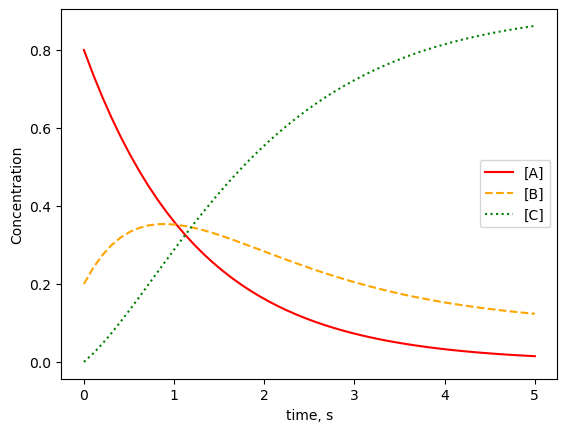

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
# константы скоростей и начальные условия
k1, k2, k3 = 0.8, 0.96, 0.1
a0, b0, c0 = 0.8, 0.2, 0.0
t0, tf = 0.0, 5.0
def func(t, y, k1, k2, k3):
    """"Returns dy_i/dt = f(t, y_i) at time t."""
    y1, y2, y3 = y
    dy1dt = -k1 * y1
    dy2dt = k1 * y1 - k2 * y2 + k3 * y3
    dy3dt = k2 * y2 - k3 * y3
    return dy1dt, dy2dt, dy3dt

y0 = a0, b0, c0

solution = solve_ivp(func, (t0, tf), y0, dense_output=True, args=(k1, k2, k3))
t = np.linspace(t0, tf, 50)
a, b, c = solution.sol(t)
# аналитическое решение

plt.xlabel('time, s')
plt.ylabel('Concentration')

plt.plot(t, a, '-', color = 'red', label = '[A]')
plt.plot(t, b, '--', color = 'orange', label = '[B]')
plt.plot(t, c, ':', color = 'green', label = '[C]')
plt.legend()
plt.show()

In [7]:
import numpy as np
from scipy.integrate import quad
global eta, tc, A, R
R = 8.314
eta = 3
tc = 647.126
A = np.array([7.4305055,-24.93618016, 195.5654567, 1986.485797, -53305.43411, 
 505697.1723, -2724774.677, 9167737.673, -19622033.78, 25984725.33,
 -19419431.35, 6263206.554])

def dels(t):
    tau = 1 - t/tc
    cv = 0
    for i in range(len(A)):
        cv += R * A[i]*tau**(i-1)
    return cv/t

r = 3 * np.array(quad(dels, 400, 500, epsabs=1.49e-8))

print(r)

[1.36585725e+02 1.51640617e-12]
